The Dijkstra class will receive input(matrix) then return the distance for all the point to others.

In [65]:
from itertools import chain
class Dijkstra:

    def __init__(self, input):
        self.input = input
        self.path = []


    def calculate(self):
        return [self.calculateFromOrigin(i) for i, v in enumerate(self.input)] #for each number from 0 -> n 
                                                                               #calculate the distances


    def calculateFromOrigin(self, origin):
        distance = [-1 for i in range(len(self.input))] # the distance = a n*n matrix = to the input matrix => the result
        path = [-1 for i in range(len(self.input))] # vector to get the best path

        # Distance from origin to itself is always 0
        distance.pop(origin)       #this line will delete the value at the number's line 
        distance.insert(origin, 0) #this will insert '0' value into the row of deleted number.   
        
        priority = list(range(len(self.input))) #list(): convert to list type, len():the length of input data, range(): the string contain len value 
                                                # => input a matrix 4x4 => return priority = [0,1,...,15]
        
        while True:
            if (len(priority) == 0): break #stop when priority list length = 0
            frm = self.getSmallestPossibleVertex(distance, priority) #this line will take the vertex from the start
            priority.remove(frm) #remove after used
            options = self.getOptionList(self.input[frm]) #take the list of number and is weight(all weight is considered = 1) 
            #> return optional list
            #now we have possibles used list, we run for loop to calculate distances from node 0 to others, then node 1,...
            for [position, weight] in options: 
                dist = distance[frm] + weight 
                if distance[position] == -1 or dist < distance[position]:
                    distance.pop(position)
                    distance.insert(position, dist)
                    #beside calculating the distances, the path list is also created
                    path.pop(position)
                    path.insert(position, frm)
        self.path.insert(origin, path)
        return distance
        
    #getSmallestPossibleVertex will run from the start node:0 to the last node, not from 0,1,2,3,.. but it consider the priority
    #for example: in 4x4 matrix, it will run through: 0->1->4->5->2->6->8->9->... 
    #no matter how it runs(may run from 1->2->3->4,.., the result will stay the same
    def getSmallestPossibleVertex(self, distances, priority):
        smallestKey = -1
        smallestValue = -1
        for i, item in enumerate(distances):
            if (smallestValue == -1 or (item >= 0 and item < smallestValue)) and i in priority:
                smallestValue = item
                smallestKey = i
#                 print("item: ",item)
#                 print("smallestKey: ", smallestKey)
        return smallestKey

    #the getOptionList take the list and return all the optional connections: for example: getOptionList([0,1,1,0]) 
    #=> return: [1,1], [2,1] means this point is connect with point 1 and 2 only, the value after ',' is the weight of the connection
    def getOptionList(self, vector):
        return [[i, weight] for i, weight in enumerate(vector) if weight > 0]
    
    
    def getPath(self):
        return self.path
    
    #getBestPath: receive frm: initial node, to: destination path
    def getBestPath(self, frm, to):
        return [i for i in reversed(self._getBestPath(frm, to, [to]))]
        
    #from the path list that we compute in the while loop of calculateFromOrigin(), return the list of nodes we need
    def _getBestPath(self, frm, to, path):
        print(self.path[frm])
        path_ = self.path[frm]
        lastNode = path_[to]
        path.append(lastNode)
        if (lastNode == frm):
            return path
        else:
            return self._getBestPath(frm, lastNode, path)
        

The GraphHelper will draw out the input matrix so it's easier for visuallization

In [66]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

class GraphHelper:
    
    @staticmethod
    def printGraph(input, featured = 0):
        # Cria os nodes
        G = nx.DiGraph()
        for el1, vector in enumerate(input):
            for el2, w in enumerate(vector):
                if w > 0: G.add_edge(el1, el2, weight=w)
        edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
        node_labels = {node:node for node in G.nodes()}

        # Increase the size
        plt.figure(num=None, figsize=(4, 4), dpi=600)

        # Draw the basic
        pos = nx.spring_layout(G)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(G, pos, labels=node_labels)
        
        # Set the color of the featured path
        if (featured):
            _featured = []
            for k, v in enumerate(featured):
                if (len(featured) >= k+2):
                    _featured.append((v, featured[k+1]))
            edge_colors = ['black' if not edge in _featured else 'red' for edge in G.edges()]
        else:
            edge_colors = 'black'
        
        nx.draw(G, pos, node_size = 700, node_color = G.nodes(), cmap=plt.cm.Blues, edge_color=edge_colors)

        plt.show()

First we declare an example 4x4 matrix with the distances between nodes is always 1 for testing.

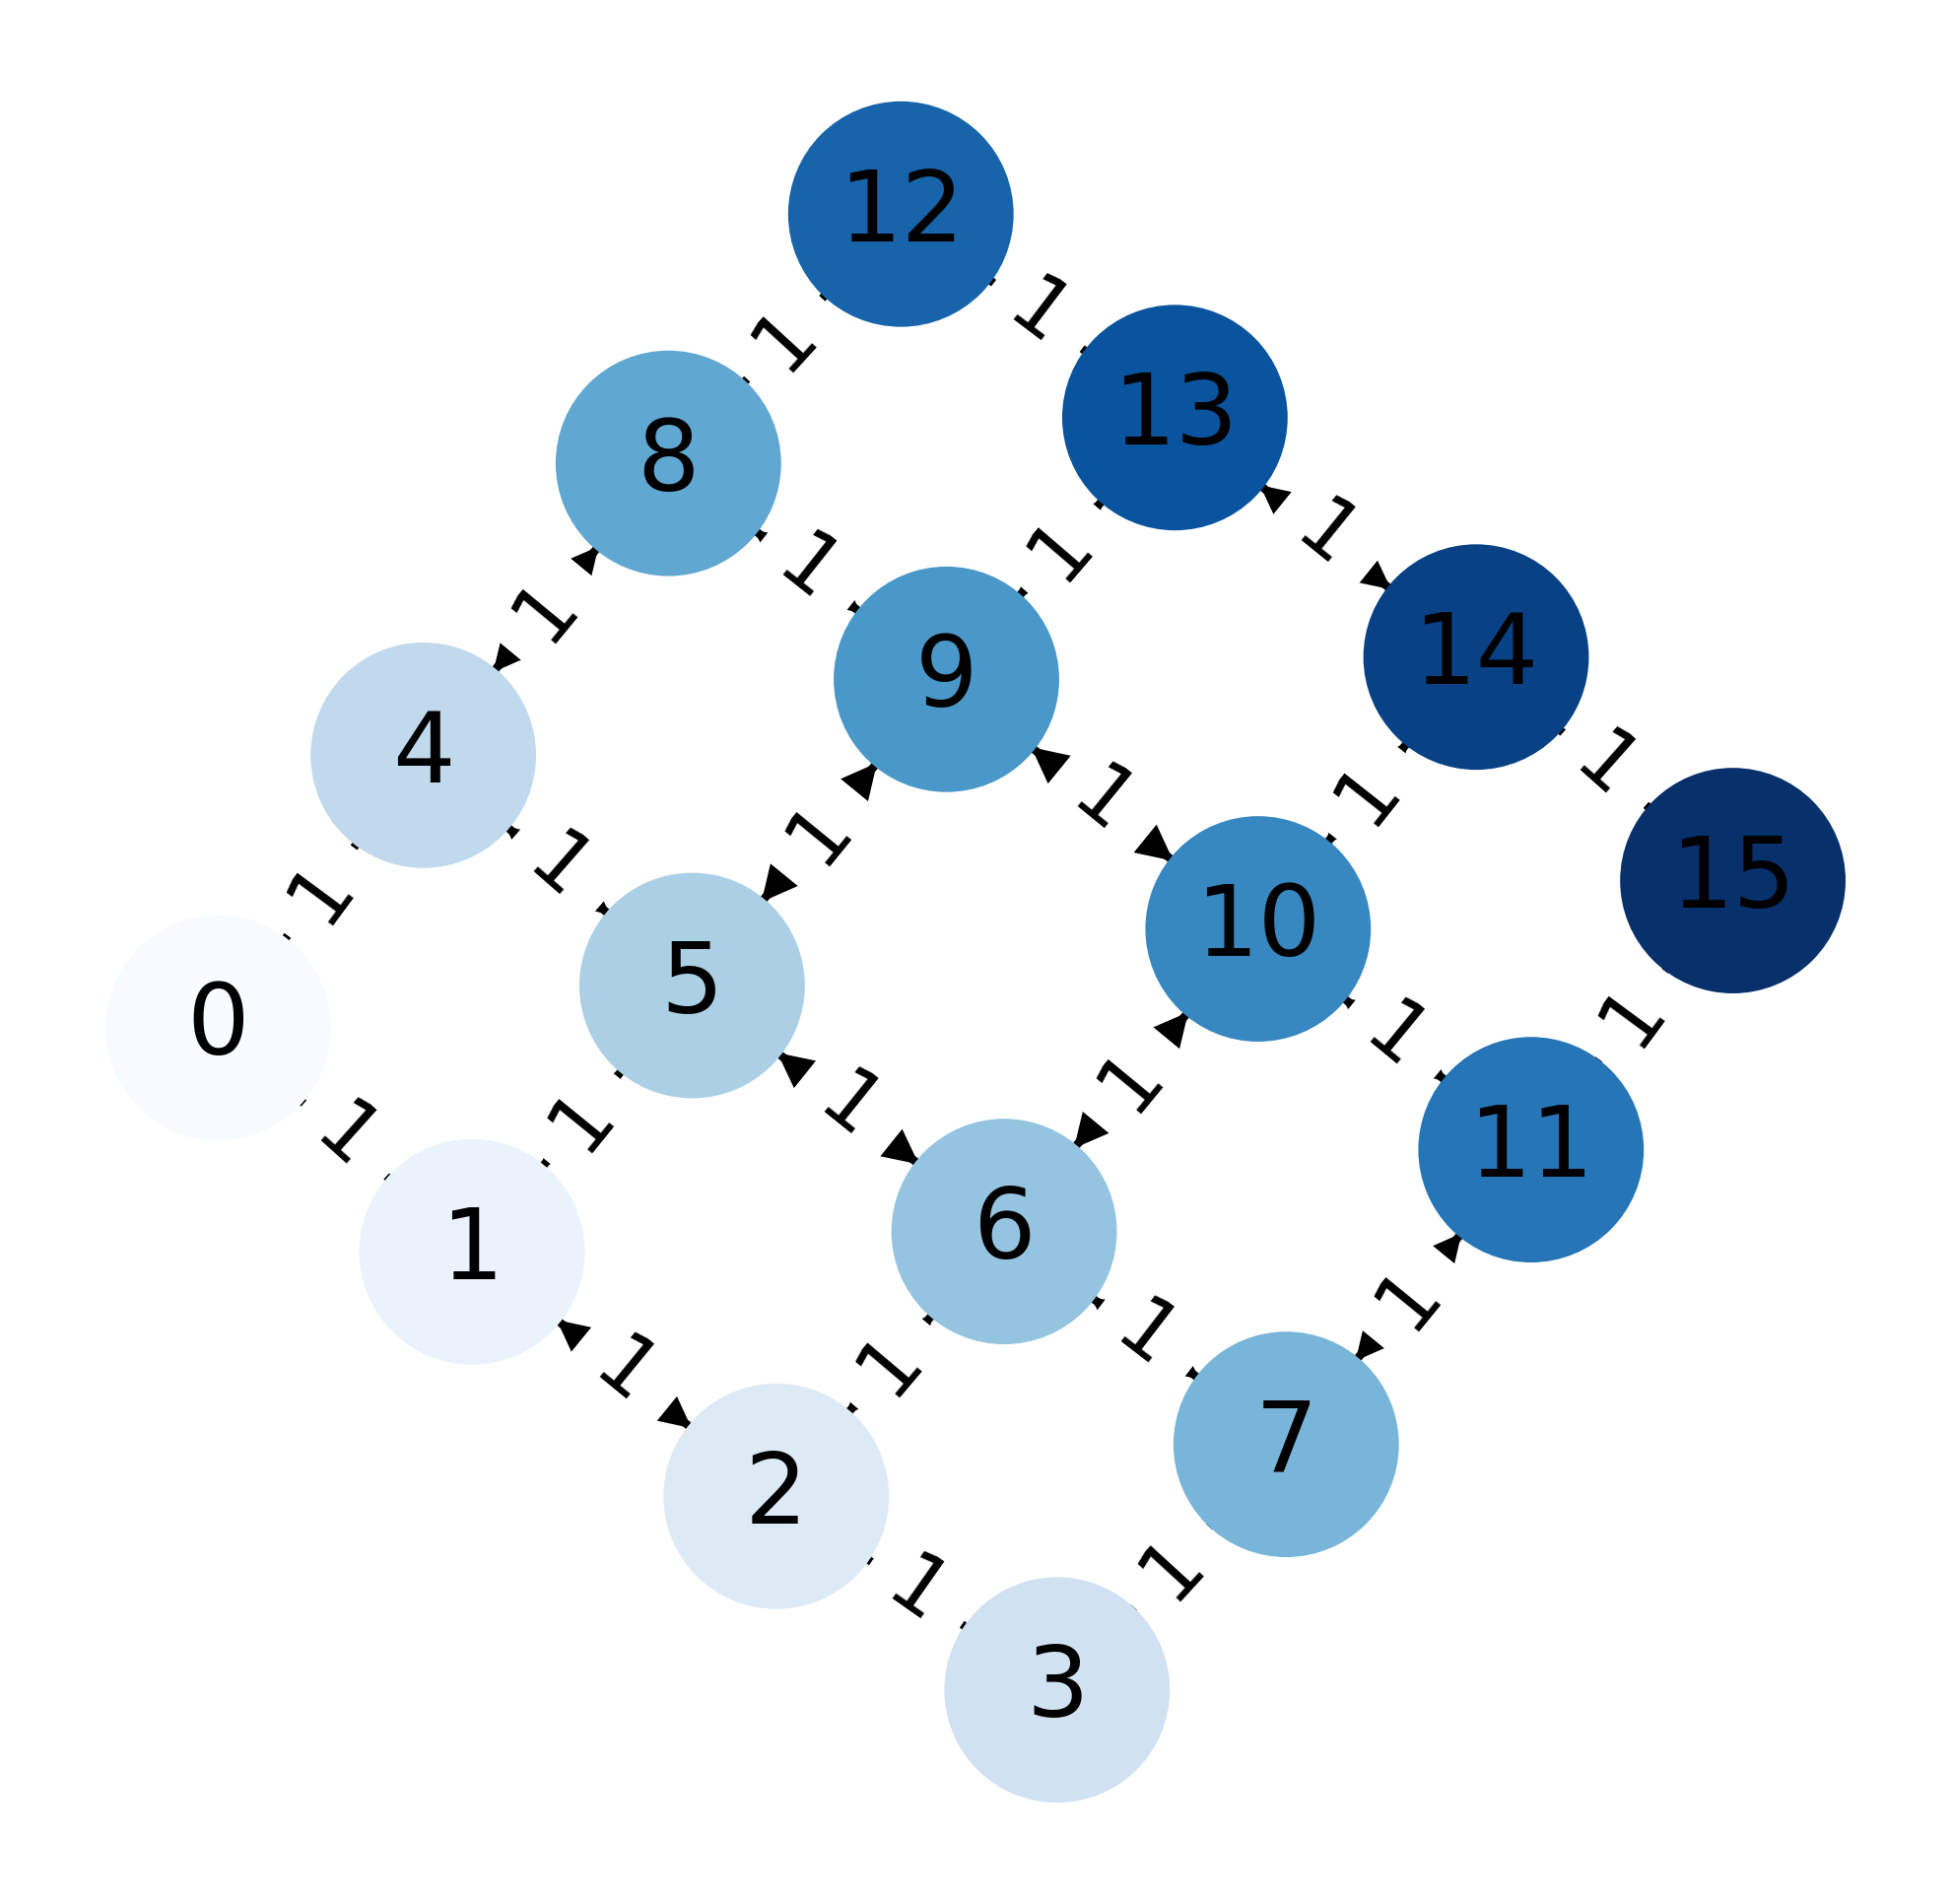

In [67]:
        #0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
input =[[0,1,0,0,1,0,0,0,0,0, 0, 0, 0, 0, 0 ,0], #0
        [1,0,1,0,0,1,0,0,0,0, 0, 0, 0, 0, 0 ,0], #1
        [0,1,0,1,0,0,1,0,0,0, 0, 0, 0, 0, 0 ,0], #2
        [0,0,1,0,0,0,0,1,0,0, 0, 0, 0, 0, 0 ,0], #3
        [1,0,0,0,0,1,0,0,1,0, 0, 0, 0, 0, 0 ,0], #4
        [0,1,0,0,1,0,1,0,0,1, 0, 0, 0, 0, 0 ,0], #5
        [0,0,1,0,0,1,0,1,0,0, 1, 0, 0, 0, 0 ,0], #6
        [0,0,0,1,0,0,1,0,0,0, 0, 1, 0, 0, 0 ,0], #7
        [0,0,0,0,1,0,0,0,0,1, 0, 0, 1, 0, 0 ,0], #8
        [0,0,0,0,0,1,0,0,1,0, 1, 0, 0, 1, 0 ,0], #9
        [0,0,0,0,0,0,1,0,0,1, 0, 1, 0, 0, 1 ,0], #10
        [0,0,0,0,0,0,0,1,0,0, 1, 0, 0, 0, 0 ,1], #11
        [0,0,0,0,0,0,0,0,1,0, 0, 0, 0, 1, 0 ,0], #12
        [0,0,0,0,0,0,0,0,0,1, 0, 0, 1, 0, 1 ,0], #13
        [0,0,0,0,0,0,0,0,0,0, 1, 0, 0, 1, 0 ,1], #14
        [0,0,0,0,0,0,0,0,0,0, 0, 1, 0, 0, 1 ,0]] #15

GraphHelper.printGraph(input)

We apply the Dijkstra to the input 4x4 matrix and receive the return result

In [68]:
dj = Dijkstra(input)
result = dj.calculate()

# Print one vector per line
if result:
    for k, v in enumerate(result): print ("from", k, v)

from 0 [0, 1, 2, 3, 1, 2, 3, 4, 2, 3, 4, 5, 3, 4, 5, 6]
from 1 [1, 0, 1, 2, 2, 1, 2, 3, 3, 2, 3, 4, 4, 3, 4, 5]
from 2 [2, 1, 0, 1, 3, 2, 1, 2, 4, 3, 2, 3, 5, 4, 3, 4]
from 3 [3, 2, 1, 0, 4, 3, 2, 1, 5, 4, 3, 2, 6, 5, 4, 3]
from 4 [1, 2, 3, 4, 0, 1, 2, 3, 1, 2, 3, 4, 2, 3, 4, 5]
from 5 [2, 1, 2, 3, 1, 0, 1, 2, 2, 1, 2, 3, 3, 2, 3, 4]
from 6 [3, 2, 1, 2, 2, 1, 0, 1, 3, 2, 1, 2, 4, 3, 2, 3]
from 7 [4, 3, 2, 1, 3, 2, 1, 0, 4, 3, 2, 1, 5, 4, 3, 2]
from 8 [2, 3, 4, 5, 1, 2, 3, 4, 0, 1, 2, 3, 1, 2, 3, 4]
from 9 [3, 2, 3, 4, 2, 1, 2, 3, 1, 0, 1, 2, 2, 1, 2, 3]
from 10 [4, 3, 2, 3, 3, 2, 1, 2, 2, 1, 0, 1, 3, 2, 1, 2]
from 11 [5, 4, 3, 2, 4, 3, 2, 1, 3, 2, 1, 0, 4, 3, 2, 1]
from 12 [3, 4, 5, 6, 2, 3, 4, 5, 1, 2, 3, 4, 0, 1, 2, 3]
from 13 [4, 3, 4, 5, 3, 2, 3, 4, 2, 1, 2, 3, 1, 0, 1, 2]
from 14 [5, 4, 3, 4, 4, 3, 2, 3, 3, 2, 1, 2, 2, 1, 0, 1]
from 15 [6, 5, 4, 3, 5, 4, 3, 2, 4, 3, 2, 1, 3, 2, 1, 0]


Now lets try to find the path from node 2 to 4

[1, 2, -1, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 2, -1, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 2, -1, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[2, 1, 0, 4]
[1, 2, -1, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 2, -1, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 2, -1, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


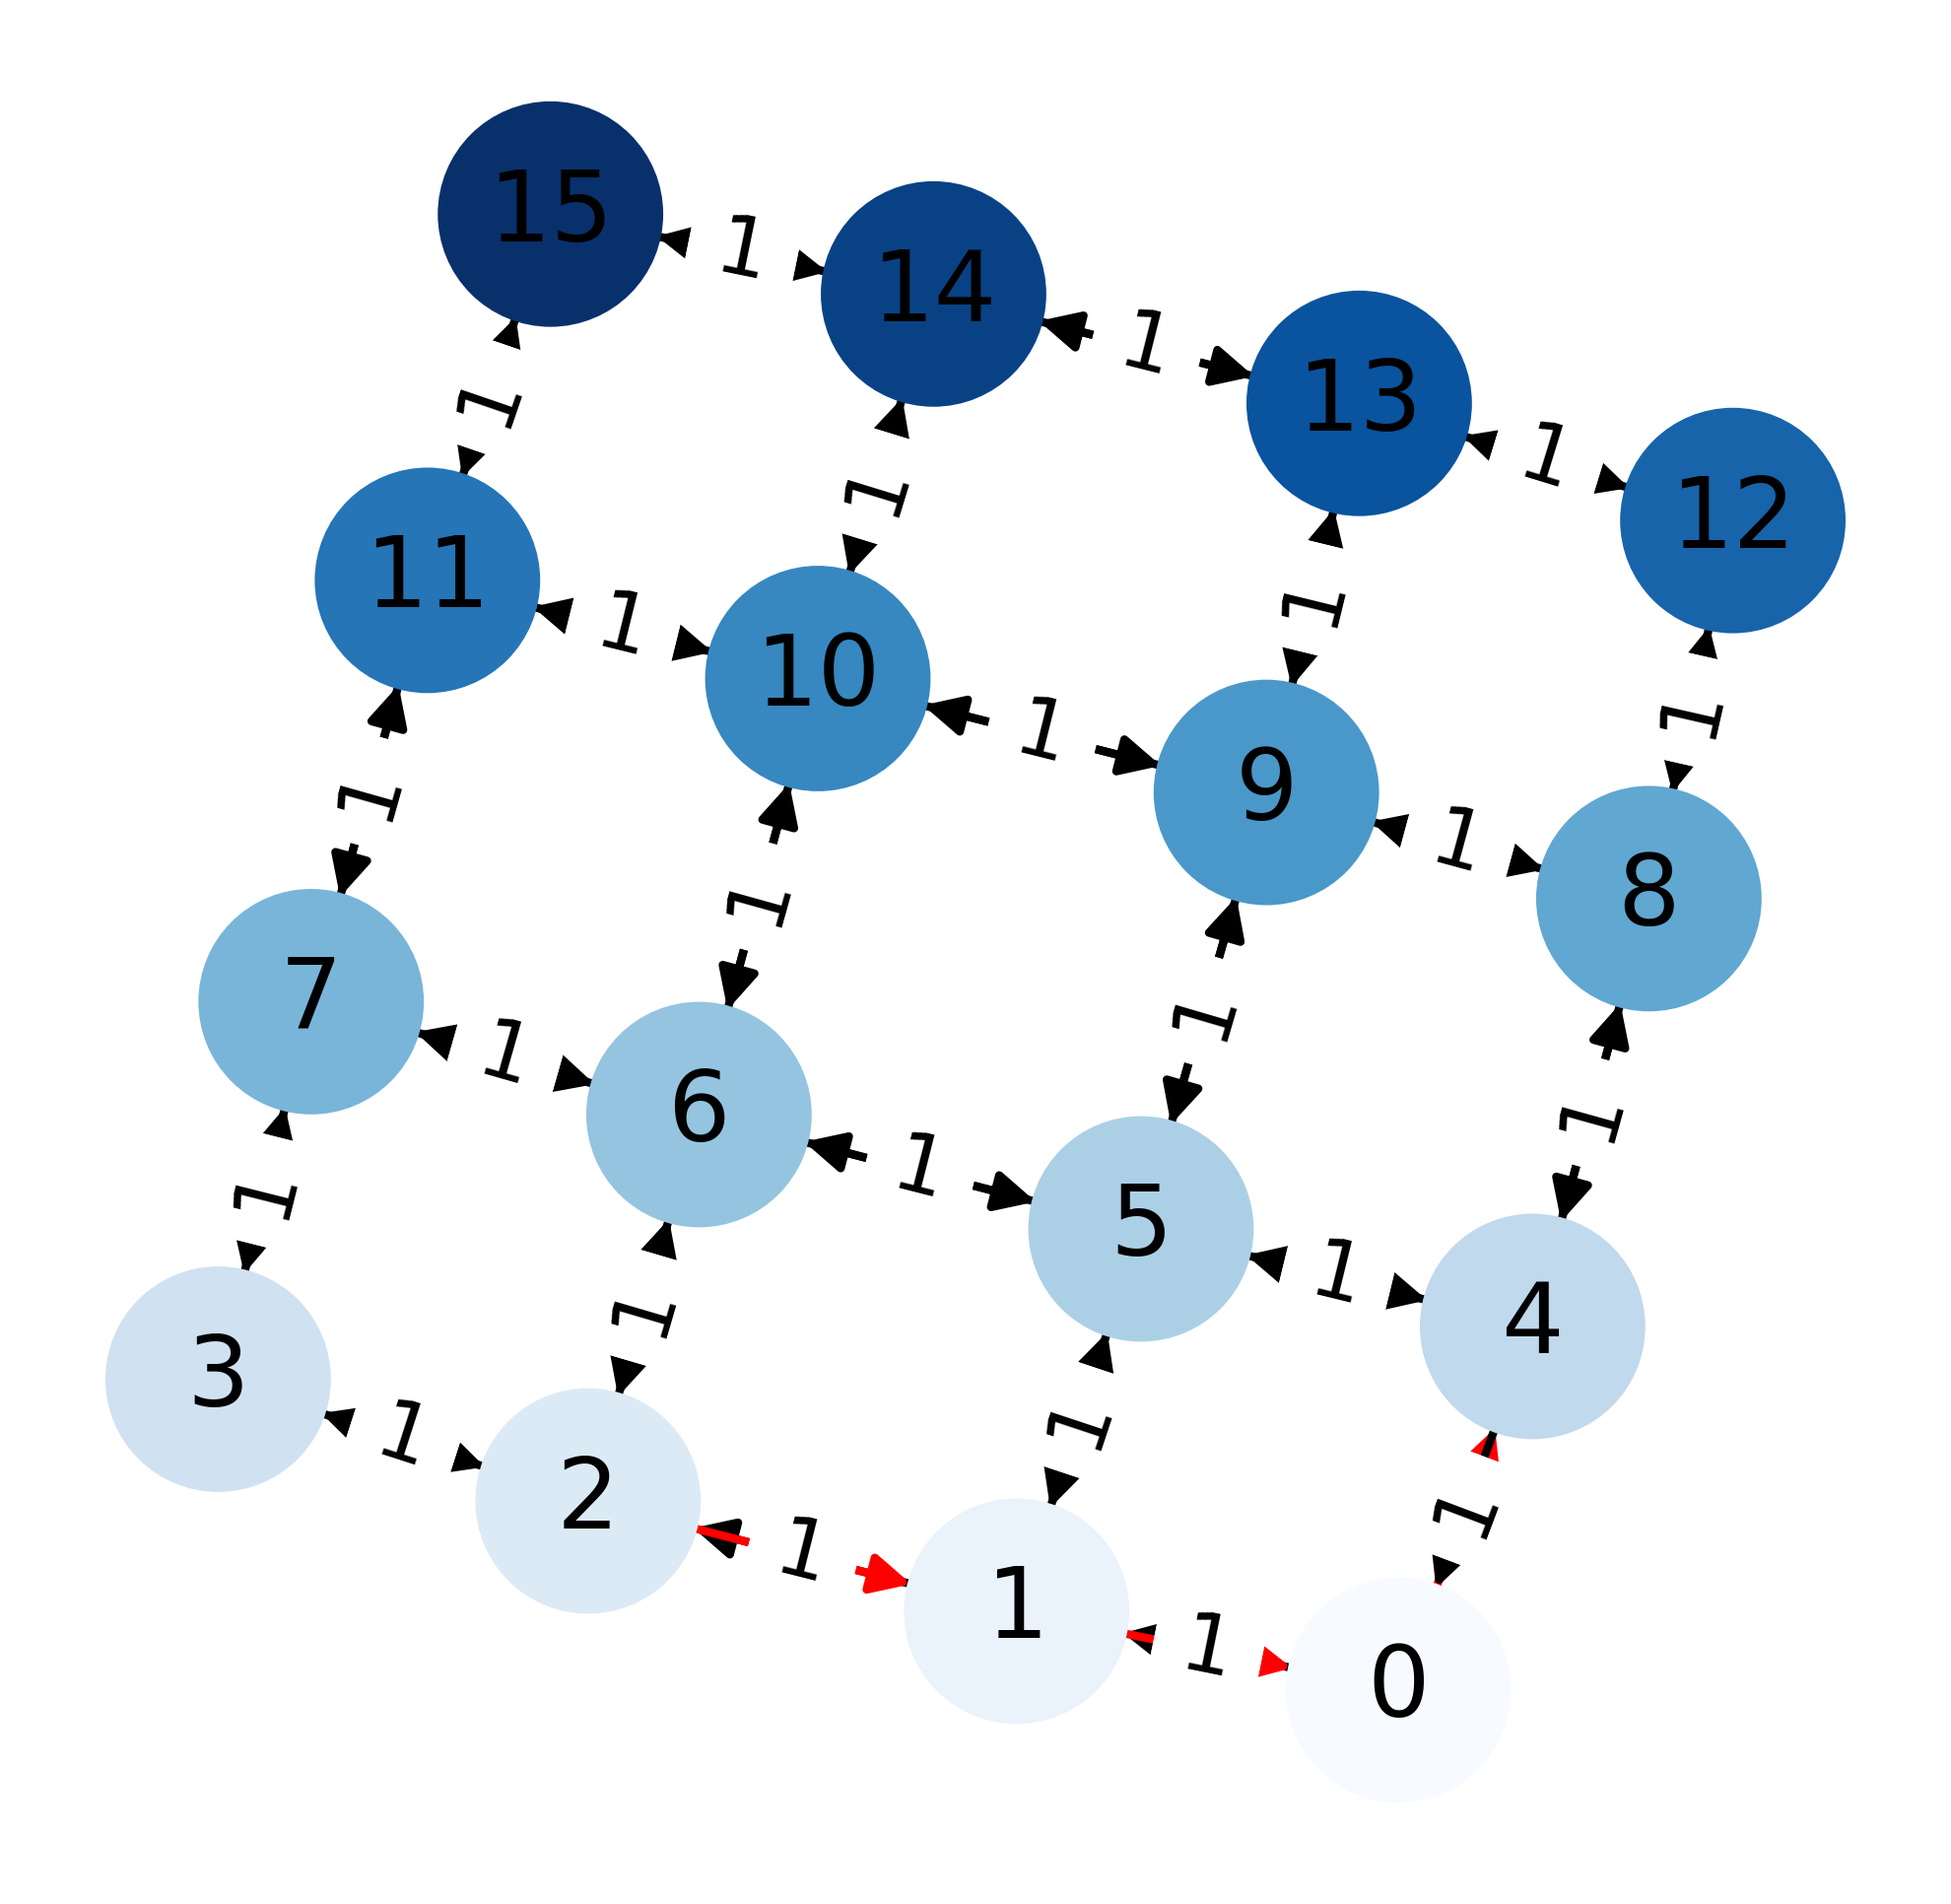

In [69]:
print(dj.getBestPath(2, 4))
GraphHelper.printGraph(input, dj.getBestPath(2, 4))

And 3 to 12

[3, 2, 1, 0, 4, 8, 12]


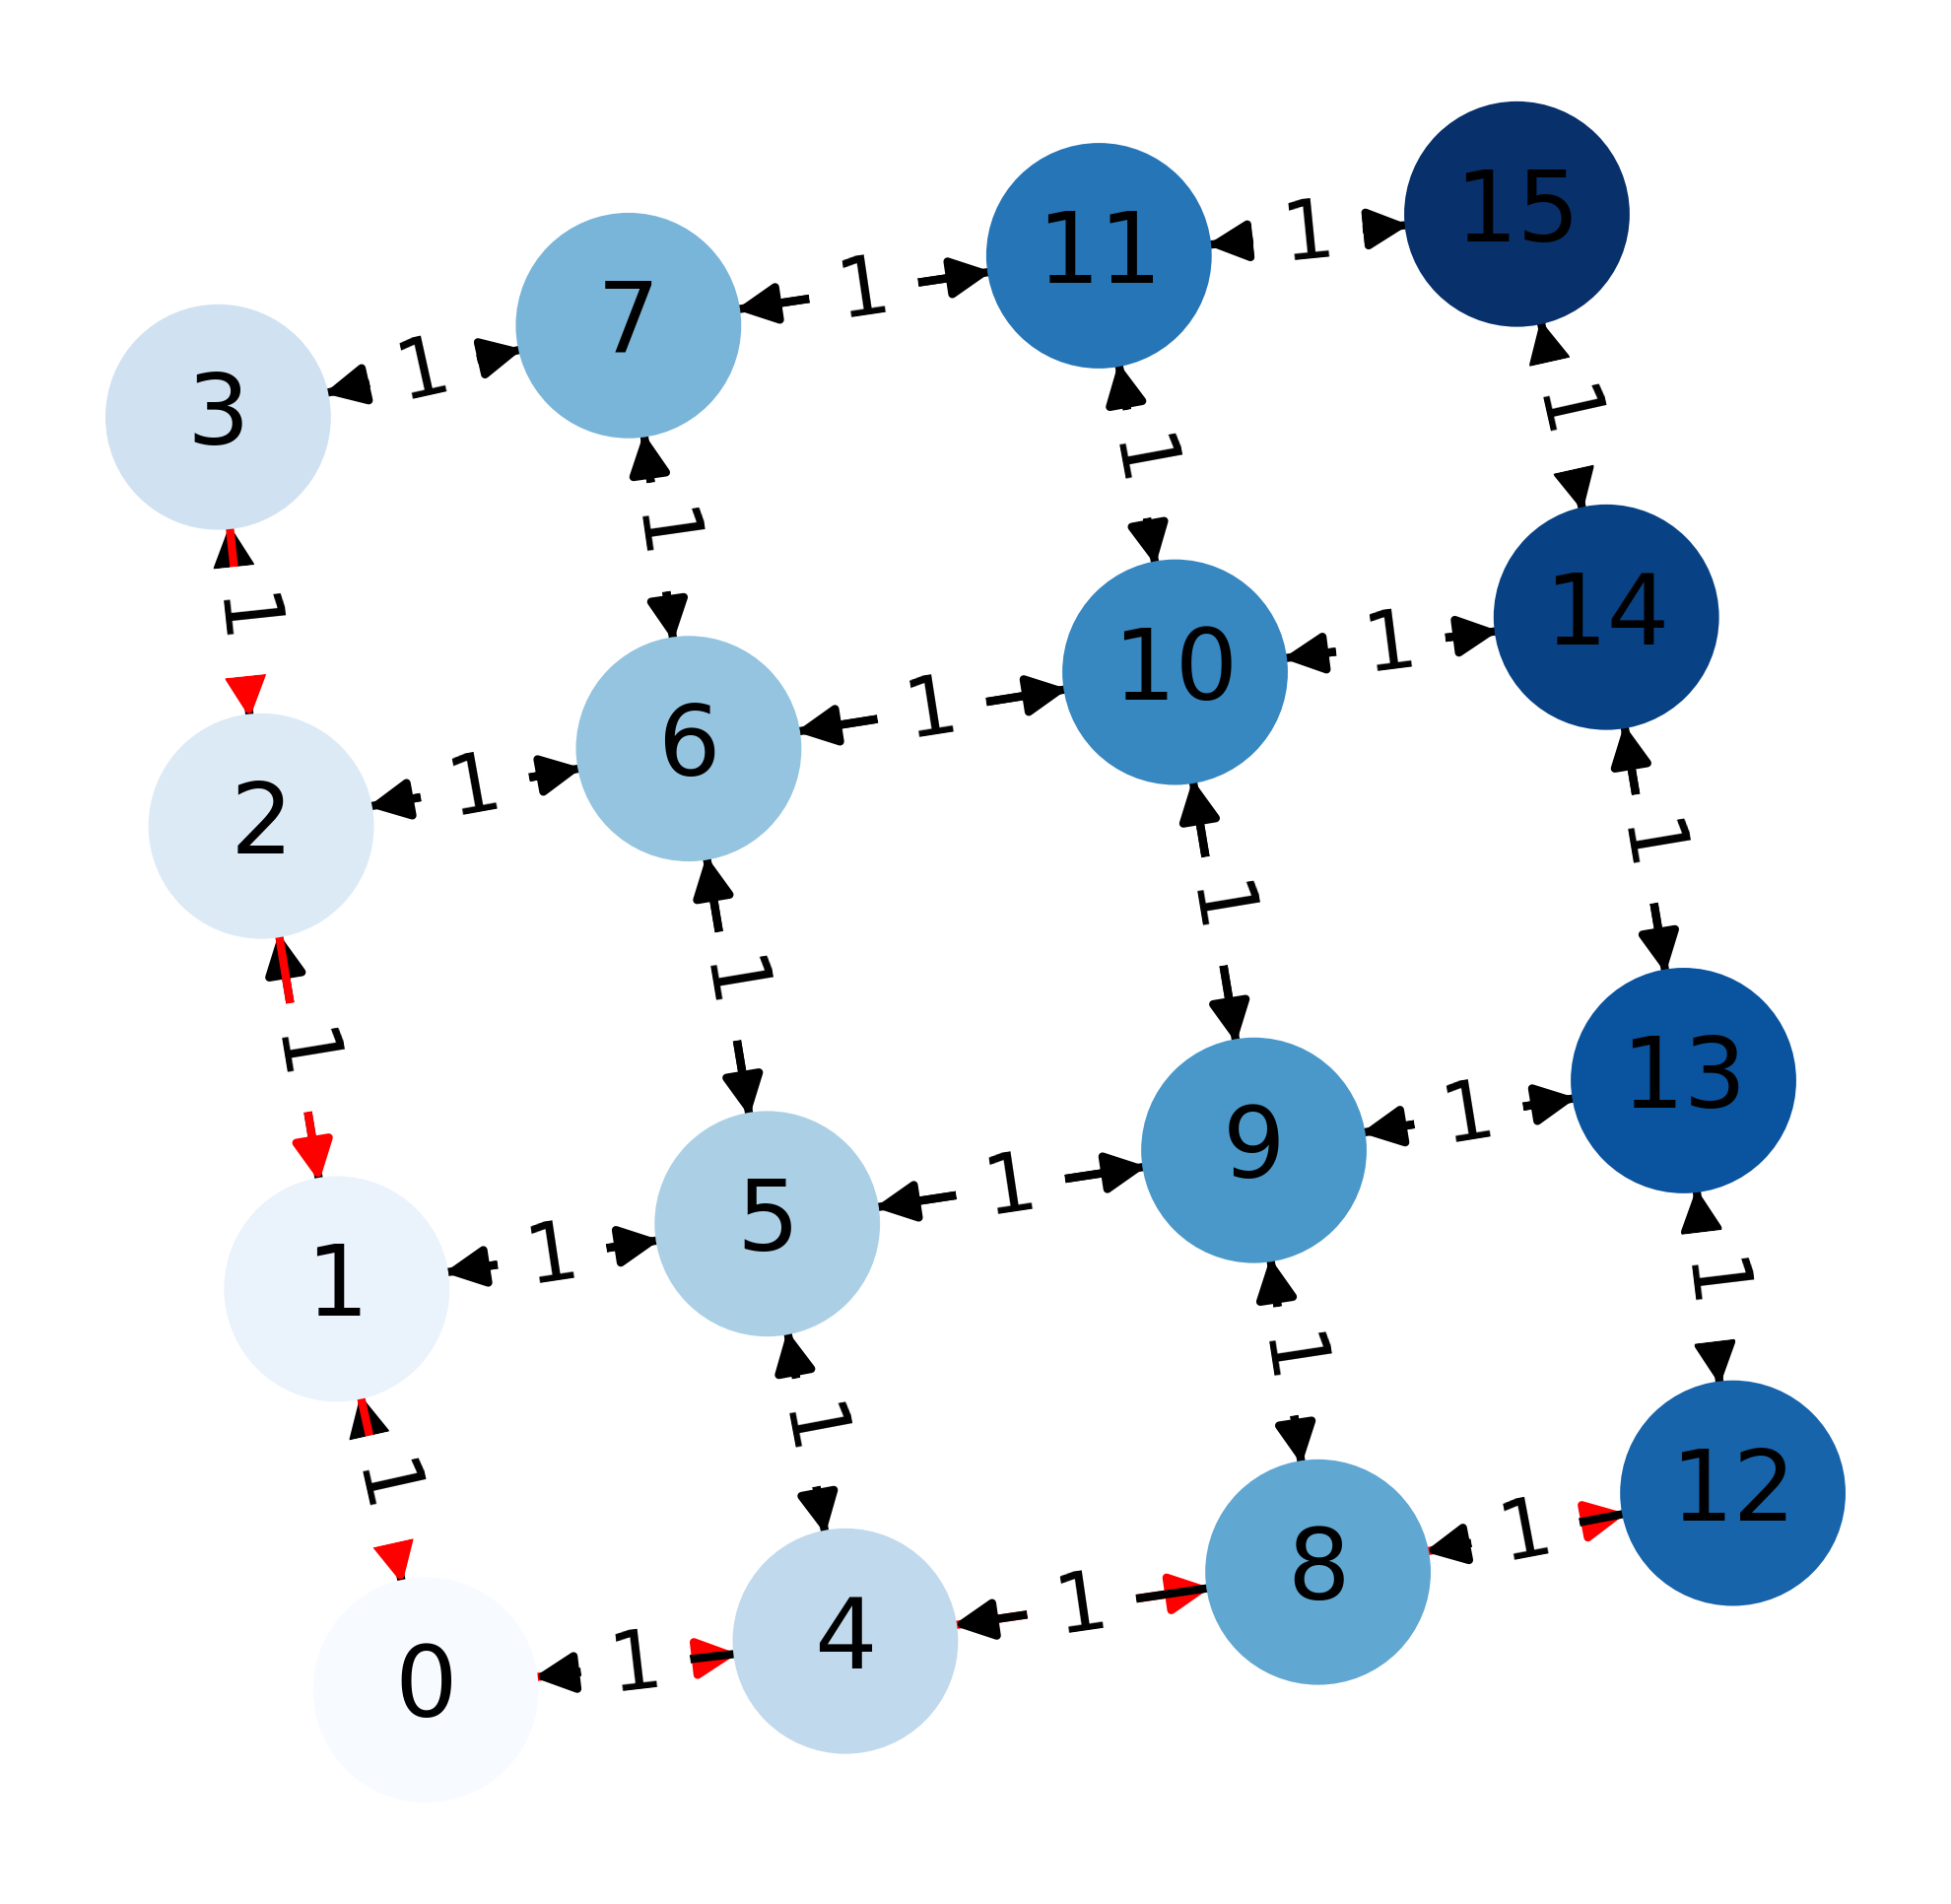

In [59]:
print(dj.getBestPath(3, 12))
GraphHelper.printGraph(input, dj.getBestPath(3, 12))

In case of object detected, we will change the data in map to 0 (which means the connection is lost and therefore no path exist)
Previously, the path from 3 to 12 will be : [3, 2, 1, 0, 4, 8, 12], lets assump that the object is between node 1 and node 0.

In [8]:
x = 0
y = 1
input [x][y] = 0
input [y][x] = 0
print(input)

[[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]]


Now we have to recalculate all the distances because the map has changed

In [9]:
dj = Dijkstra(input)
result = dj.calculate()

# Print one vector per line
if result:
    for k, v in enumerate(result): print ("from", k, v)

from 0 [0, 2, 3, 4, 1, 1, 2, 3, 2, 2, 3, 4, 3, 3, 4, 5]
from 1 [3, 0, 1, 2, 2, 1, 2, 3, 3, 2, 3, 4, 4, 3, 4, 5]
from 2 [4, 1, 0, 1, 3, 2, 1, 2, 4, 3, 2, 3, 5, 4, 3, 4]
from 3 [5, 2, 1, 0, 4, 3, 2, 1, 5, 4, 3, 2, 6, 5, 4, 3]
from 4 [1, 2, 3, 4, 0, 1, 2, 3, 1, 2, 3, 4, 2, 3, 4, 5]
from 5 [2, 1, 2, 3, 1, 0, 1, 2, 2, 1, 2, 3, 3, 2, 3, 4]
from 6 [3, 2, 1, 2, 2, 1, 0, 1, 3, 2, 1, 2, 4, 3, 2, 3]
from 7 [4, 3, 2, 1, 3, 2, 1, 0, 4, 3, 2, 1, 5, 4, 3, 2]
from 8 [2, 3, 4, 5, 1, 2, 3, 4, 0, 1, 2, 3, 1, 2, 3, 4]
from 9 [3, 2, 3, 4, 2, 1, 2, 3, 1, 0, 1, 2, 2, 1, 2, 3]
from 10 [4, 3, 2, 3, 3, 2, 1, 2, 2, 1, 0, 1, 3, 2, 1, 2]
from 11 [5, 4, 3, 2, 4, 3, 2, 1, 3, 2, 1, 0, 4, 3, 2, 1]
from 12 [3, 4, 5, 6, 2, 3, 4, 5, 1, 2, 3, 4, 0, 1, 2, 3]
from 13 [4, 3, 4, 5, 3, 2, 3, 4, 2, 1, 2, 3, 1, 0, 1, 2]
from 14 [5, 4, 3, 4, 4, 3, 2, 3, 3, 2, 1, 2, 2, 1, 0, 1]
from 15 [6, 5, 4, 3, 5, 4, 3, 2, 4, 3, 2, 1, 3, 2, 1, 0]


and now lets go to find the path again. But start from node 1 to the destination - node 12 
(because the car will reach or return to the node 1 as long as it detects an object) 

[1, 5, 4, 8, 12]


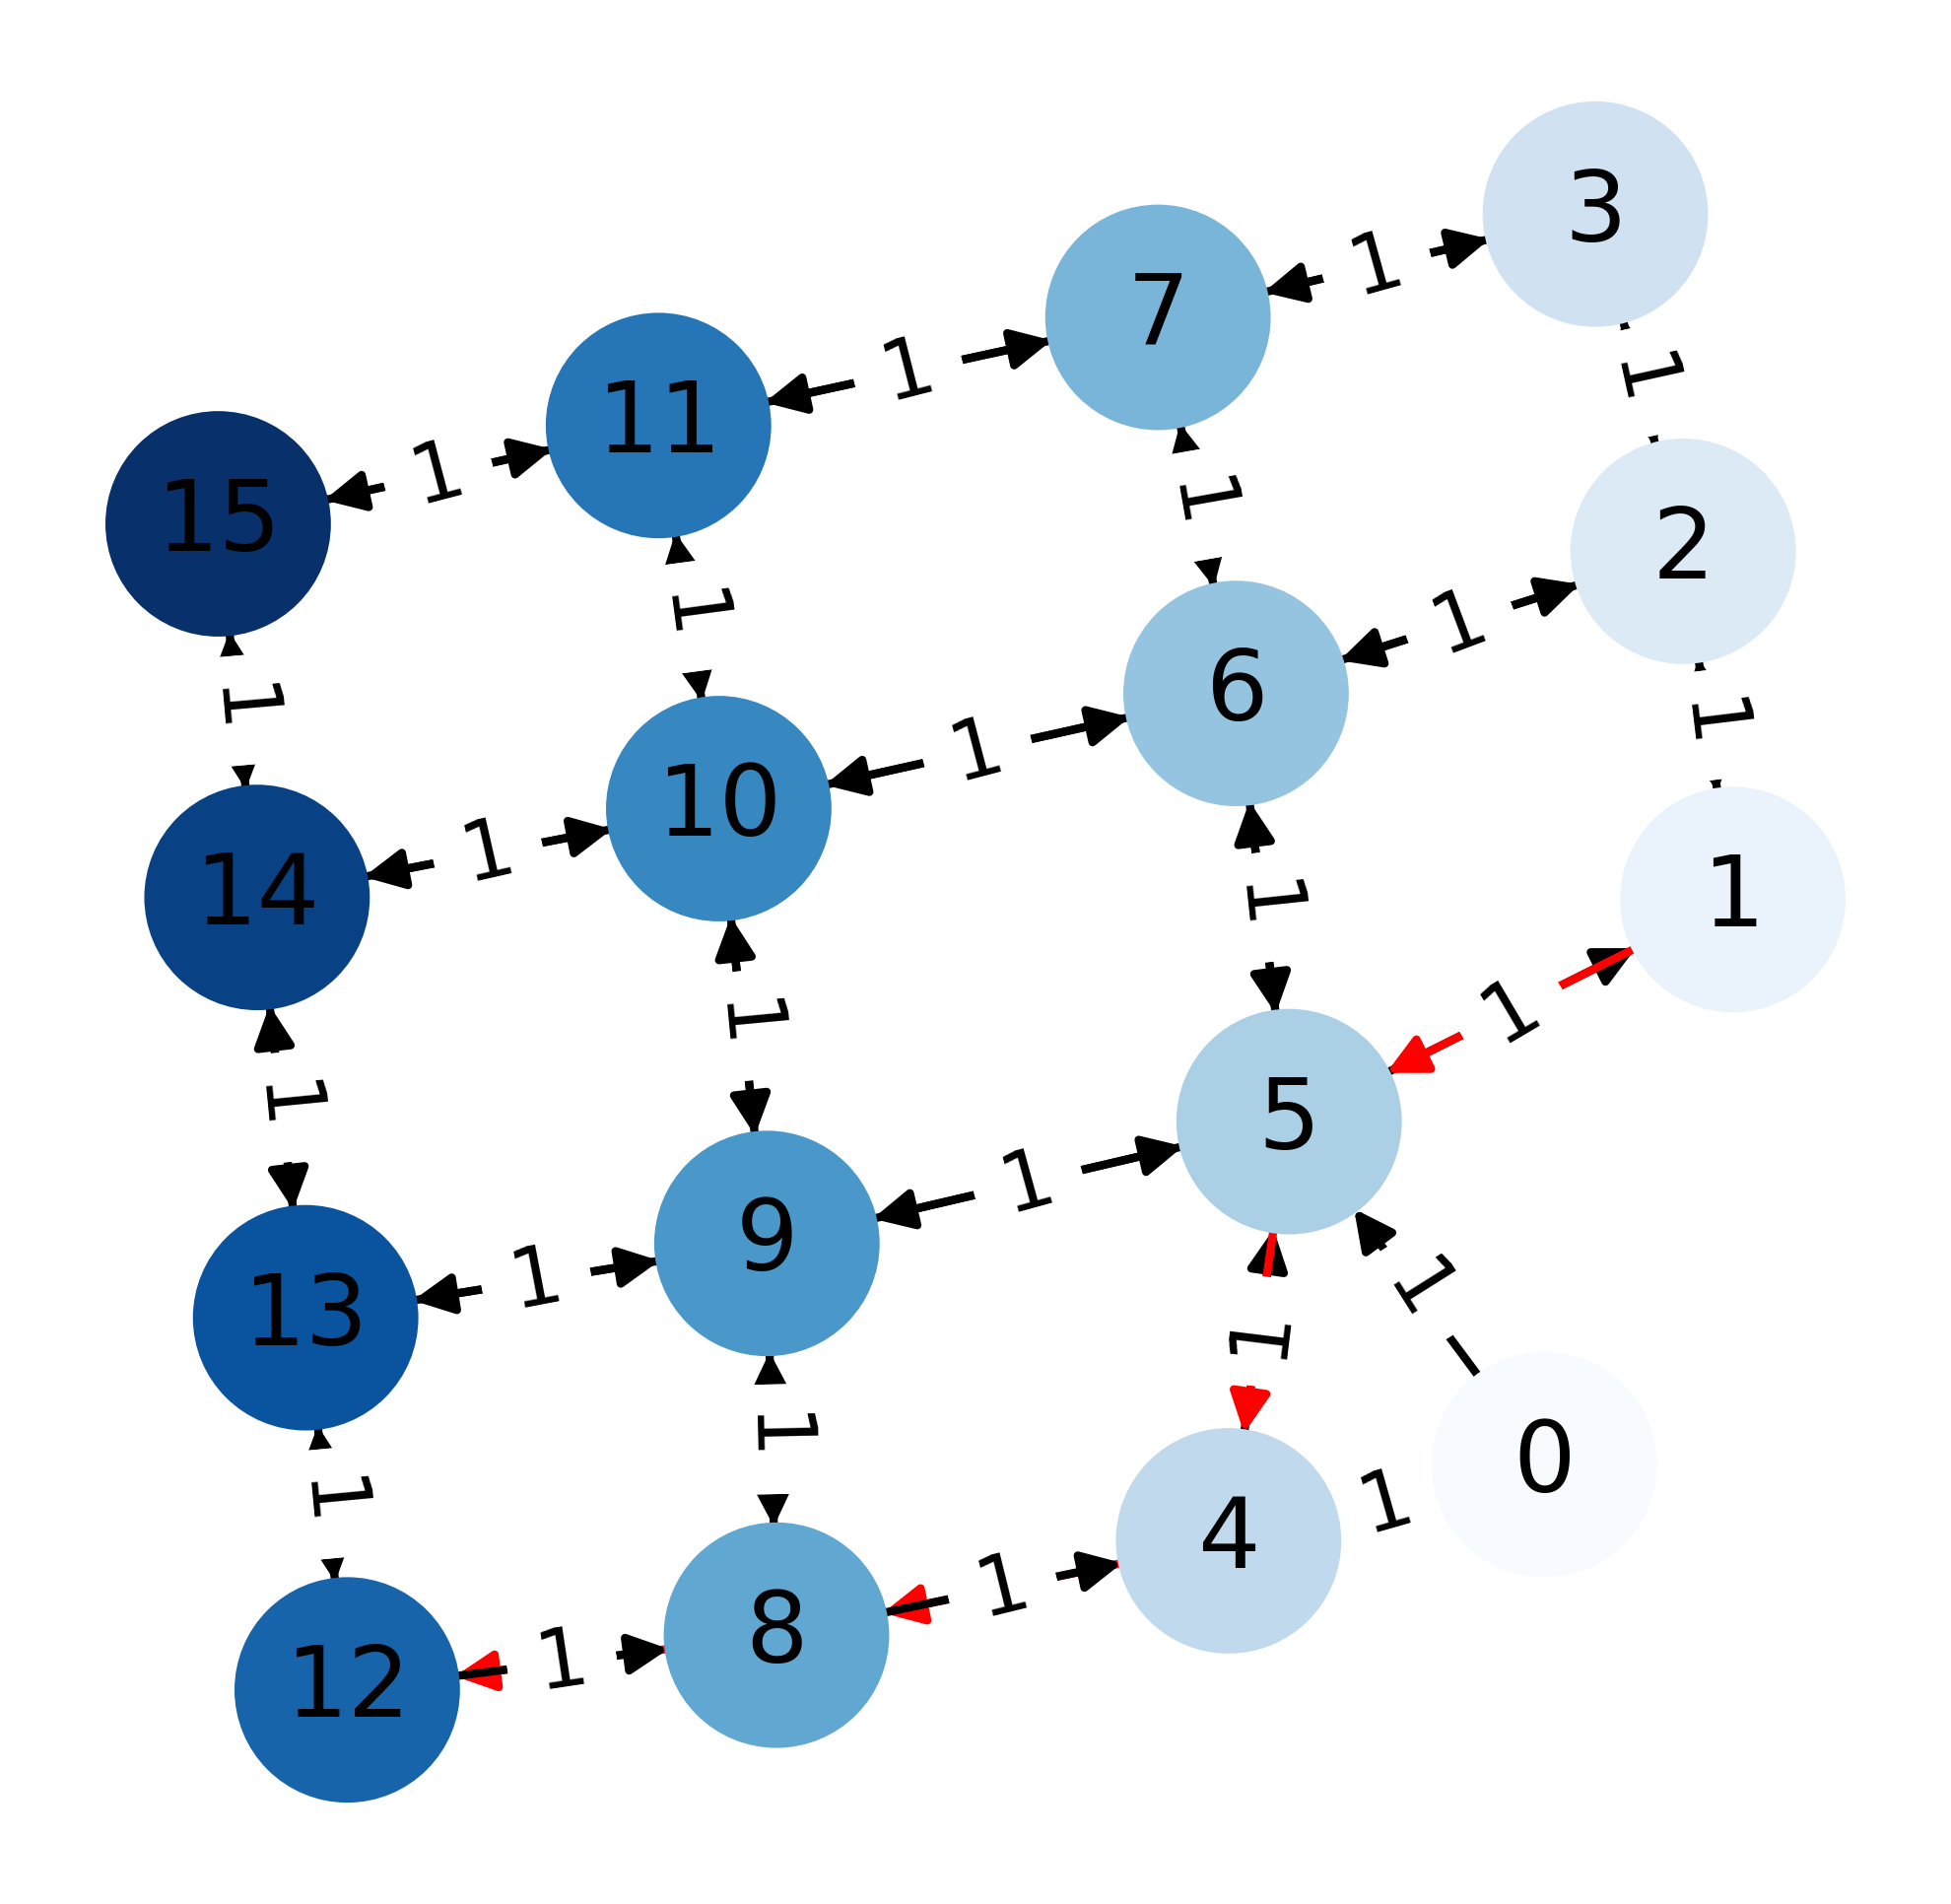

In [12]:
print(dj.getBestPath(y, 12))
GraphHelper.printGraph(input, dj.getBestPath(y, 12))

The path have change from [3, 2, 1, 0, 4, 8, 12] to [3, 2, 1, 5, 8, 12]

and then we have to return the map to initial and recalculate distances

In [13]:
input [x][y] = 1
input [y][x] = 1
dj = Dijkstra(input)
result = dj.calculate()